AllTrails is notorious for having inaccurate elevation gain data. This is because a hiker's GPS data is used to determine a trail's elevation gain. Noise in the gps data leads to inflated elevation gain values, particularily for flat trails. I looked up AllTrails trails similar to some I've completed. For each trail, I looked up the matching route on Komoot to find the trail's elevation gain according to topographic data. The elevation gain from the topographic data is treated as the true elevation gain. Here, I compare the topographic and GPS values of elevation gain. Through trial and error, I find a way to convert the GPS data to approximate align with the topographic data.

Maximum Slope: 54.604


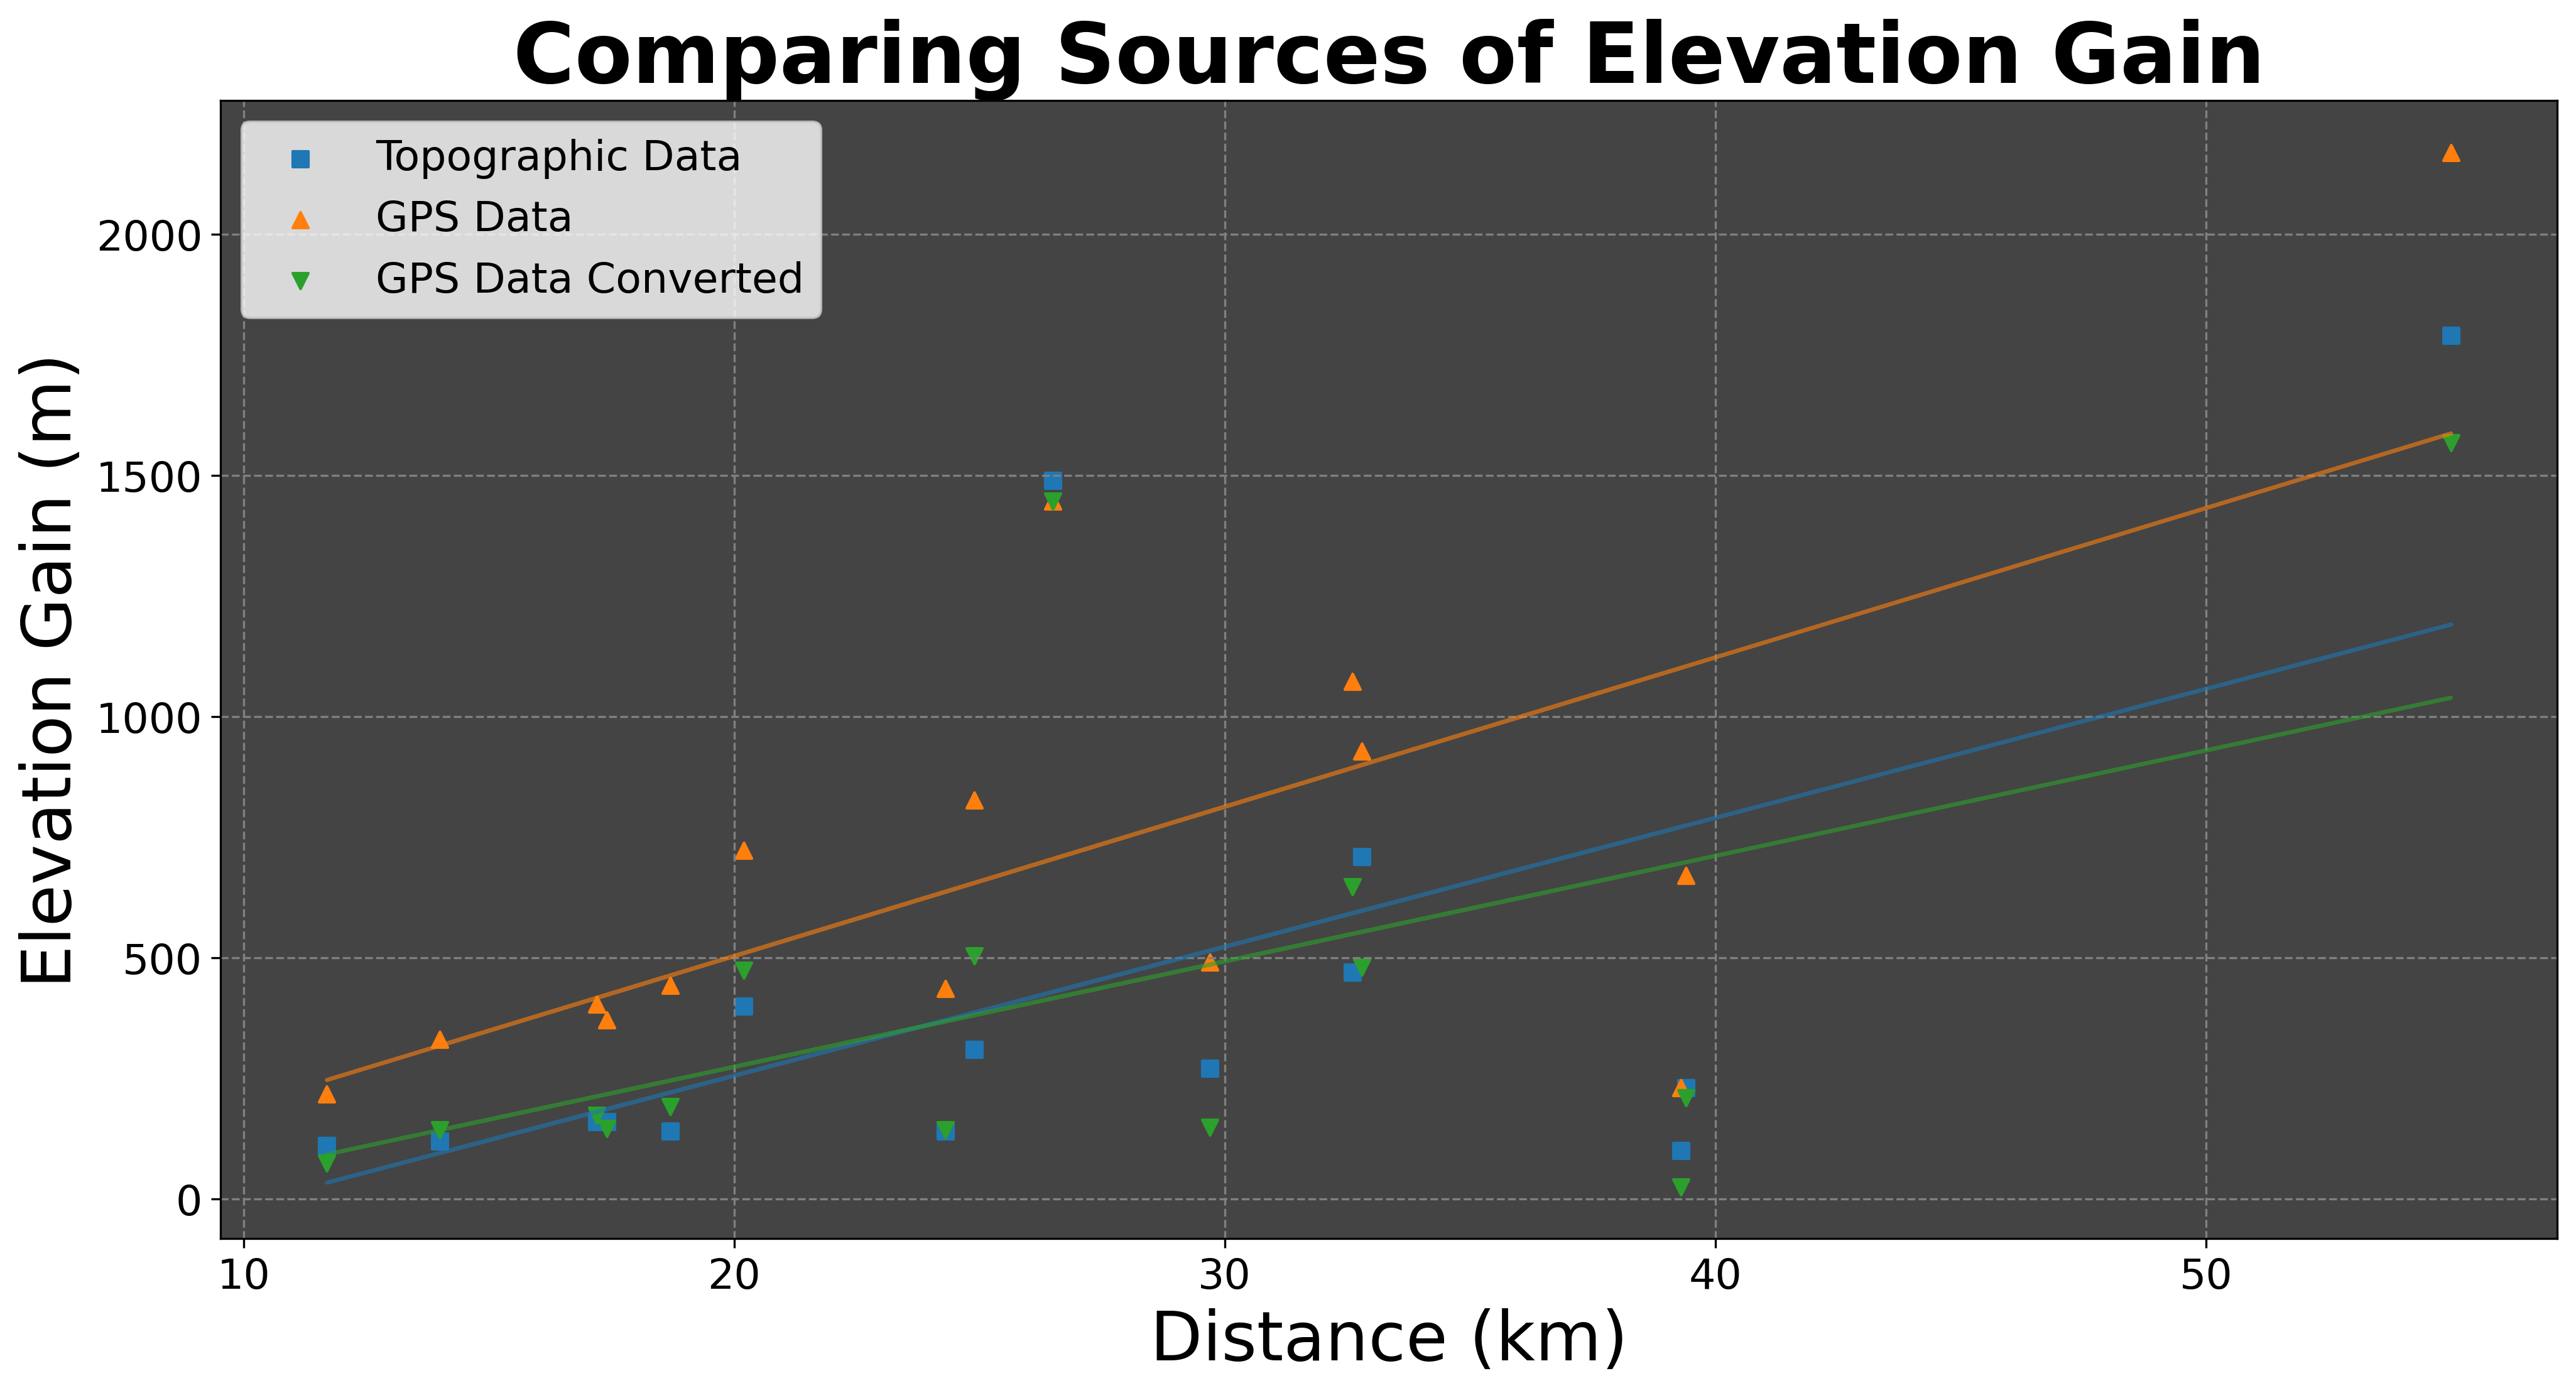

In [45]:
# imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# fetching data
trails = pd.read_csv("ElevationGainSources.csv", engine='python')
trails['slope'] = trails.gps_gain/trails.distance

# plotting
plt.scatter(trails.distance, trails.topo_gain, label='Topographic Data', marker='s')
a1, b1 = np.polyfit(trails.distance, trails.topo_gain, 1)
plt.plot(trails.distance, a1*trails.distance+b1, alpha=0.6)     

plt.scatter(trails.distance, trails.gps_gain, label='GPS Data', marker='^')
a2, b2 = np.polyfit(trails.distance, trails.gps_gain, 1)
plt.plot(trails.distance, a2*trails.distance+b2, alpha=0.6)

# manipluating GPS data to appoximately align with topographic data
maxSlope = trails.slope.max()
plt.scatter(trails.distance, trails.gps_gain*(trails.slope/maxSlope), 
            label='GPS Data Converted', marker='v')
a3, b3 = np.polyfit(trails.distance, trails.gps_gain*(trails.slope/maxSlope), 1) # conversion
plt.plot(trails.distance, a3*trails.distance+b3, alpha=0.6)

fig = plt.gcf()
ax = plt.gca()
plt.rcParams['axes.facecolor'] = 'w'
plt.grid(axis="both", which="both", ls='--', c='grey', zorder=0)
fig.set_size_inches(16, 8)
ax.tick_params(axis='both', which='both', labelsize=16)
ax.set_title("Comparing Sources of Elevation Gain", size=32, fontweight='bold')
plt.xlabel("Distance (km)", size=26)
plt.ylabel("Elevation Gain (m)", size=26)
plt.grid(axis="both", which="both", ls='--', c='grey', zorder=0)
fig.patch.set_facecolor('w')
plt.rcParams['axes.facecolor'] = '#444444'
plt.legend(facecolor='w', prop={'size': 16})
fig.set_dpi(300)

print(f'Maximum Slope: {round(maxSlope, 3)}')
plt.show()